<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

<img src="Figures/MNIST-Handwritten digits.png" height=450 width=450/>

#### TensorFlow Installation

In [447]:
#!pip install tensorflow
import tensorflow as tf

In [448]:
print(tf.version.VERSION)

2.9.1


#### Import the necessary libraries

In [449]:
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import math

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

In [450]:
K.backend()

'tensorflow'

#### Load and split MNIST for training and testing

In [451]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### Explore the dataset

Keras Handwritten digit MNIST dataset

<img src="Figures/dataset.png" height=450 width=450 />

In [452]:
len(X_train)

60000

In [453]:
len(X_test)

10000

In [454]:
X_train[0].shape

(28, 28)

It would be something like this

<img src='Figures/pixel.png' />

In [455]:
X_train[0]
# Displays 28 x 28 pixels in 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

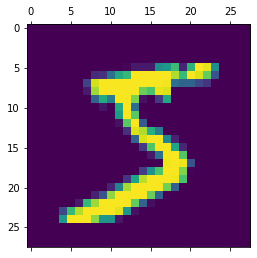

In [456]:
plt.matshow(X_train[0])

In [457]:
y_train[0]
# Label for the above input image

5

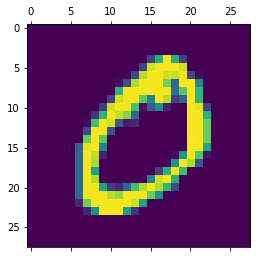

In [458]:
plt.matshow(X_train[1])

In [459]:
y_train[1]

0

In [460]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Flattening

In [461]:
X_train.shape

(60000, 28, 28)

In [462]:
X_train.shape[1]

28

You must convert this into 6000, 784

In [463]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [464]:
X_train_flattened.shape

(60000, 784)

In [465]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [466]:
X_test_flattened = X_test.reshape(len(X_test),  28 * 28)
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Normalize the input dataset

In [467]:
X_train_normalized = X_train_flattened / 255

In [468]:
X_train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [469]:
X_test_normalized = X_test_flattened / 255

### NN model with one hidden layer

<img src="Figures/model2.png" height=400 width=400 />

###### Model configuration

In [470]:
model = keras.Sequential([
    # input layer 784 neurons to first hidden layer with 64 neurons
    keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
    # Previous hidden layer to output layer
    keras.layers.Dense(10, activation='sigmoid')    
])

##### Model summary

In [471]:
model.summary()

Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_378 (Dense)           (None, 64)                50240     
                                                                 
 dense_379 (Dense)           (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Layer details

In [472]:
model.layers

In [473]:
len(model.layers)

2

In [474]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [475]:
model.fit(X_train_normalized, y_train, epochs = 100, verbose=1, batch_size=60000)

Epoch 1/100
1/1 [==============================] - 1s 635ms/step - loss: 2.3746 - accuracy: 0.0920
Epoch 2/100
1/1 [==============================] - 0s 153ms/step - loss: 2.2541 - accuracy: 0.1697
Epoch 3/100
1/1 [==============================] - 0s 150ms/step - loss: 2.1504 - accuracy: 0.2681
Epoch 4/100
1/1 [==============================] - 0s 147ms/step - loss: 2.0557 - accuracy: 0.3533
Epoch 5/100
1/1 [==============================] - 0s 154ms/step - loss: 1.9658 - accuracy: 0.4299
Epoch 6/100
1/1 [==============================] - 0s 167ms/step - loss: 1.8791 - accuracy: 0.4989
Epoch 7/100
1/1 [==============================] - 0s 198ms/step - loss: 1.7951 - accuracy: 0.5563
Epoch 8/100
1/1 [==============================] - 0s 161ms/step - loss: 1.7137 - accuracy: 0.6005
Epoch 9/100
1/1 [==============================] - 0s 170ms/step - loss: 1.6354 - accuracy: 0.6348
Epoch 10/100
1/1 [==============================] - 0s 155ms/step - loss: 1.5603 - accuracy: 0.6599
Epoch 11/

1/1 [==============================] - 0s 140ms/step - loss: 0.3426 - accuracy: 0.9079
Epoch 84/100
1/1 [==============================] - 0s 161ms/step - loss: 0.3405 - accuracy: 0.9084
Epoch 85/100
1/1 [==============================] - 0s 166ms/step - loss: 0.3385 - accuracy: 0.9088
Epoch 86/100
1/1 [==============================] - 0s 153ms/step - loss: 0.3365 - accuracy: 0.9093
Epoch 87/100
1/1 [==============================] - 0s 155ms/step - loss: 0.3345 - accuracy: 0.9096
Epoch 88/100
1/1 [==============================] - 0s 157ms/step - loss: 0.3326 - accuracy: 0.9100
Epoch 89/100
1/1 [==============================] - 0s 169ms/step - loss: 0.3308 - accuracy: 0.9107
Epoch 90/100
1/1 [==============================] - 0s 157ms/step - loss: 0.3289 - accuracy: 0.9109
Epoch 91/100
1/1 [==============================] - 0s 164ms/step - loss: 0.3271 - accuracy: 0.9113
Epoch 92/100
1/1 [==============================] - 0s 156ms/step - loss: 0.3254 - accuracy: 0.9118
Epoch 93/100


##### Printing the weights

Getting weights and bias values after the training stage

In [476]:
original_weights = model.get_weights()
# convert list to array
weights = np.array(original_weights)
weights

<ipython-input-476-4f8fb3d8cc7f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(original_weights)


array([array([[ 0.06340026, -0.02897418, -0.0784095 , ...,  0.02736821,
               -0.0046067 ,  0.06479026],
              [ 0.0699518 , -0.04663527, -0.05467907, ...,  0.035309  ,
               -0.06926119,  0.07375864],
              [-0.00308214,  0.06695976, -0.02812622, ..., -0.05457207,
                0.03190113, -0.04619702],
              ...,
              [ 0.06191992, -0.0658448 ,  0.08371036, ..., -0.00815347,
                0.04107063,  0.06101494],
              [ 0.04280712, -0.07916703, -0.080406  , ..., -0.07946578,
                0.04251819,  0.04277796],
              [ 0.04589235,  0.03573829, -0.03714584, ...,  0.01787372,
                0.06795045, -0.00738102]], dtype=float32)              ,
       array([ 4.62936424e-02,  4.02215235e-02,  2.78966315e-02,  2.74863932e-02,
               4.01680917e-02,  2.44882815e-02, -3.06545780e-03,  3.78029719e-02,
               5.50994836e-02,  8.36548395e-04,  6.13322705e-02,  1.83599479e-02,
               4.908

In [477]:
weights.shape

(4,)

In [478]:
# weights of first layer
weights[0].shape

(784, 64)

In [479]:
# bias of first layer
weights[1].shape

(64,)

In [480]:
# weights of second layer
weights[2].shape

(64, 10)

In [481]:
# bias of second layer
weights[3].shape

(10,)

In [482]:
weights[0] 

array([[ 0.06340026, -0.02897418, -0.0784095 , ...,  0.02736821,
        -0.0046067 ,  0.06479026],
       [ 0.0699518 , -0.04663527, -0.05467907, ...,  0.035309  ,
        -0.06926119,  0.07375864],
       [-0.00308214,  0.06695976, -0.02812622, ..., -0.05457207,
         0.03190113, -0.04619702],
       ...,
       [ 0.06191992, -0.0658448 ,  0.08371036, ..., -0.00815347,
         0.04107063,  0.06101494],
       [ 0.04280712, -0.07916703, -0.080406  , ..., -0.07946578,
         0.04251819,  0.04277796],
       [ 0.04589235,  0.03573829, -0.03714584, ...,  0.01787372,
         0.06795045, -0.00738102]], dtype=float32)

In [483]:
model.layers[0].get_weights()
# displays the weights and biases of first layer

[array([[ 0.06340026, -0.02897418, -0.0784095 , ...,  0.02736821,
         -0.0046067 ,  0.06479026],
        [ 0.0699518 , -0.04663527, -0.05467907, ...,  0.035309  ,
         -0.06926119,  0.07375864],
        [-0.00308214,  0.06695976, -0.02812622, ..., -0.05457207,
          0.03190113, -0.04619702],
        ...,
        [ 0.06191992, -0.0658448 ,  0.08371036, ..., -0.00815347,
          0.04107063,  0.06101494],
        [ 0.04280712, -0.07916703, -0.080406  , ..., -0.07946578,
          0.04251819,  0.04277796],
        [ 0.04589235,  0.03573829, -0.03714584, ...,  0.01787372,
          0.06795045, -0.00738102]], dtype=float32),
 array([ 4.62936424e-02,  4.02215235e-02,  2.78966315e-02,  2.74863932e-02,
         4.01680917e-02,  2.44882815e-02, -3.06545780e-03,  3.78029719e-02,
         5.50994836e-02,  8.36548395e-04,  6.13322705e-02,  1.83599479e-02,
         4.90897968e-02,  6.54635951e-02,  1.71562601e-02, -3.79542224e-02,
         5.02280220e-02,  2.06099842e-02,  4.78929058e

In [484]:
model.layers[0].get_weights()[0]
# Displays the weights of first layer

array([[ 0.06340026, -0.02897418, -0.0784095 , ...,  0.02736821,
        -0.0046067 ,  0.06479026],
       [ 0.0699518 , -0.04663527, -0.05467907, ...,  0.035309  ,
        -0.06926119,  0.07375864],
       [-0.00308214,  0.06695976, -0.02812622, ..., -0.05457207,
         0.03190113, -0.04619702],
       ...,
       [ 0.06191992, -0.0658448 ,  0.08371036, ..., -0.00815347,
         0.04107063,  0.06101494],
       [ 0.04280712, -0.07916703, -0.080406  , ..., -0.07946578,
         0.04251819,  0.04277796],
       [ 0.04589235,  0.03573829, -0.03714584, ...,  0.01787372,
         0.06795045, -0.00738102]], dtype=float32)

In [485]:
model.layers[0].get_weights()[1]
# Displays the biases of first layer

array([ 4.62936424e-02,  4.02215235e-02,  2.78966315e-02,  2.74863932e-02,
        4.01680917e-02,  2.44882815e-02, -3.06545780e-03,  3.78029719e-02,
        5.50994836e-02,  8.36548395e-04,  6.13322705e-02,  1.83599479e-02,
        4.90897968e-02,  6.54635951e-02,  1.71562601e-02, -3.79542224e-02,
        5.02280220e-02,  2.06099842e-02,  4.78929058e-02, -1.31427795e-02,
        4.03015204e-02, -6.08461164e-03,  3.58597040e-02,  5.24843484e-02,
        4.88867387e-02,  4.52591516e-02,  1.78793259e-02,  4.16181013e-02,
        3.74755897e-02,  9.83160734e-03,  5.77794164e-02, -1.07943304e-02,
       -6.35466725e-02,  1.65701583e-02,  4.13751899e-04,  4.26965468e-02,
        2.81666815e-02,  5.67876510e-02,  1.87494829e-02,  1.66482180e-02,
        5.84033951e-02,  7.79571803e-03, -7.47323284e-05,  3.62544470e-02,
       -1.33635746e-02,  5.86632267e-02,  7.38843530e-03, -1.05441520e-02,
        2.48703007e-02,  4.06964757e-02, -4.15223883e-03, -2.21928973e-02,
        2.54185759e-02,  

In [486]:
model.layers[1].get_weights()
# displays the weights and biases of second layer

[array([[-0.33037502,  0.21003617, -0.0681676 ,  0.08154225,  0.3513347 ,
         -0.02996558, -0.23726144,  0.15463062, -0.353414  , -0.18985002],
        [ 0.01062402,  0.23706251,  0.11120413, -0.03708227, -0.16225843,
         -0.31917518,  0.25543287,  0.00747361, -0.23416805, -0.32377625],
        [-0.2621755 ,  0.30849773,  0.2475565 ,  0.17839271, -0.02540711,
         -0.01560291, -0.15259856, -0.09318189,  0.03444565, -0.20654698],
        [ 0.23855877, -0.07082545,  0.07667655, -0.154039  , -0.04178073,
          0.2452102 , -0.21237853,  0.07771351,  0.16438003,  0.27497247],
        [ 0.23165292, -0.11754362,  0.32276204,  0.15353149, -0.25950778,
          0.09117487,  0.15649259, -0.01187141, -0.10205694,  0.08863693],
        [-0.15669912, -0.04001639, -0.22716278,  0.03159056,  0.0904514 ,
         -0.06323534,  0.22248052, -0.32265553, -0.08324011,  0.06892861],
        [ 0.11032552, -0.14657487,  0.15514441, -0.27330062,  0.11784013,
         -0.08434638,  0.0132072

##### Storing and retrieving the weights

##### Storing and retrieving the models

##### HM model

In [487]:
np.random.seed(3)
def get_model(): 
    model = keras.Sequential([
        # input layer 784 neurons to first hidden layer with 64 neurons
        keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
        # first hidden layer with 64 neurons
        keras.layers.Dense(64, activation='relu'), 
        # second hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # Output layer with 10 neurons
        keras.layers.Dense(10, activation='sigmoid')
    ])
    # General SGD
    #opti = keras.optimizers.SGD(learning_rate=0.001)
    # SGD with momentum
    #opti = keras.optimizers.SGD(learning_rate=0.001, momentum=0.6)
    # SGD with Nesterov momentum 
    #opti = keras.optimizers.SGD(learning_rate=0.001, momentum=0.6, nesterov=True)
    # RMSprop 
    #opti = keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.6)
    # Adam
    #opti = keras.optimizers.Adam(learning_rate=0.001)
    # Adadelta
    #opti = keras.optimizers.Adadelta(learning_rate=0.001)
    # Adagrad
    #opti = keras.optimizers.Adagrad(learning_rate=0.001)
    # Adamax
    #opti = keras.optimizers.Adamax(learning_rate=0.001)
    # Nadam
    opti = keras.optimizers.Nadam(learning_rate=0.001)
    
    model.compile(
        optimizer = opti,
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [488]:
class CustomCallback(keras.callbacks.Callback):  
    iteration = 0
    batch_size = 60000
    training_set_size = 0
    update_every_fold = 0
    initial_weights = 0
    previous_weights = 0
    call_hm = 0
    call_am = 0 
     
    def on_train_begin(self, logs=None):
        self.initial_weights = model_hm.get_weights() 
        self.initial_weights = np.array(self.initial_weights,dtype=object)
        self.previous_weights = self.initial_weights
        # Harmonic mean based weights calculation
        self.call_hm = np.vectorize(self.apply_hm) 
        # Arithmetic mean based weights calculation
        self.call_am = np.vectorize(self.apply_am) 
        #Determining number of updates every epoch
        self.training_set_size = X_train_normalized.shape[0]
        self.update_every_fold = self.fold_calc(self.batch_size, self.training_set_size)
    
         
    def on_epoch_begin(self, epoch,  logs=None): 
        self.iteration = 1   
        
    def on_train_batch_end(self, batch, logs=None): 
        if self.iteration%self.update_every_fold == 0:  
            counter = 0
            num_layers = len(model_hm.layers)  
            current_weights = model_hm.get_weights()
            current_weights = np.array(current_weights,dtype=object)        

            for i in range(num_layers):  
                # Harmonic mean based update
                current_weights[counter] = self.call_hm(self.previous_weights[counter], current_weights[counter])
                # Arithmetic mean based update
                #current_weights[counter] = self.call_am(self.previous_weights[counter], current_weights[counter])
                counter = counter + 2

            updated = current_weights.tolist()   
            model_hm.set_weights(updated)
            self.previous_weights = current_weights
        self.iteration = self.iteration + 1  
    
    #def on_epoch_end(self, epoch, logs={}):
      # print(model.loss)

    def apply_hm(self, v1, v2):     
        if v1==0 or v2==0:
            return v2
        elif v1>0 and v2>0:
            hm = 2*v1*v2/(v1+v2)
            min1 = min(v1,v2)
            diff = abs(hm-min1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        elif v1<0 and v2<0:
            hm = 2*v1*v2/(v1+v2)
            max1 = max(v1,v2)
            diff = abs(hm-max1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        else:
            return v2    
        
    def apply_am(self, v1, v2):     
        if v1==0 or v2==0:
            return v2
        elif v1>0 and v2>0:
            am = (v1+v2)/2
            min1 = min(v1,v2)
            diff = abs(am-min1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        elif v1<0 and v2<0:
            am = (v1+v2)/2
            max1 = max(v1,v2)
            diff = abs(am-max1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        else:
            return v2  
        
    def fold_calc(self, batch_size, training_set_size): 
        total_fold = int(math.ceil(math.log2(training_set_size)))
        #print("total_fold   :", total_fold) 
        num_batch = math.ceil(training_set_size / batch_size)
        #print("num_batch   :", num_batch)
        batch_fold = int(math.floor(math.log2(batch_size)))
        #print("batch_fold   :", batch_fold)
        update_every_fold = (total_fold-batch_fold)    
        #print("update_every_fold   :", update_every_fold)
        num_updates = num_batch/update_every_fold
        #print("num_updates   :", num_updates)
        return update_every_fold

#### Training

In [489]:
csv_logger = CSVLogger('log.csv', append=False, separator=',') 
model_hm = get_model() 
st = time.time()
model_hm.fit(X_train_normalized, y_train, epochs = 100, verbose=1, callbacks=[CustomCallback(),csv_logger], batch_size=60000) 
#hist = model_hm.fit(X_train_normalized, y_train, epochs = 100, verbose=1, callbacks=[CustomCallback(),csv_logger], batch_size=60000) 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.3702 - accuracy: 0.0728
Epoch 2/100
1/1 [==============================] - 0s 217ms/step - loss: 2.2487 - accuracy: 0.1477
Epoch 3/100
1/1 [==============================] - 0s 228ms/step - loss: 2.1699 - accuracy: 0.2501
Epoch 4/100
1/1 [==============================] - 0s 215ms/step - loss: 2.0899 - accuracy: 0.3179
Epoch 5/100
1/1 [==============================] - 0s 207ms/step - loss: 2.0030 - accuracy: 0.3768
Epoch 6/100
1/1 [==============================] - 0s 218ms/step - loss: 1.9066 - accuracy: 0.4396
Epoch 7/100
1/1 [==============================] - 0s 207ms/step - loss: 1.7997 - accuracy: 0.5098
Epoch 8/100
1/1 [==============================] - 0s 236ms/step - loss: 1.6840 - accuracy: 0.5828
Epoch 9/100
1/1 [==============================] - 0s 219ms/step - loss: 1.5627 - accuracy: 0.6468
Epoch 10/100
1/1 [==============================] - 0s 208ms/step - loss: 1.4393 - accuracy: 0.6984
Epoch 11/100

1/1 [==============================] - 0s 198ms/step - loss: 0.2564 - accuracy: 0.9258
Epoch 84/100
1/1 [==============================] - 0s 215ms/step - loss: 0.2550 - accuracy: 0.9272
Epoch 85/100
1/1 [==============================] - 0s 205ms/step - loss: 0.2529 - accuracy: 0.9269
Epoch 86/100
1/1 [==============================] - 0s 204ms/step - loss: 0.2514 - accuracy: 0.9280
Epoch 87/100
1/1 [==============================] - 0s 223ms/step - loss: 0.2492 - accuracy: 0.9281
Epoch 88/100
1/1 [==============================] - 0s 212ms/step - loss: 0.2476 - accuracy: 0.9289
Epoch 89/100
1/1 [==============================] - 0s 198ms/step - loss: 0.2455 - accuracy: 0.9294
Epoch 90/100
1/1 [==============================] - 0s 206ms/step - loss: 0.2438 - accuracy: 0.9302
Epoch 91/100
1/1 [==============================] - 0s 207ms/step - loss: 0.2419 - accuracy: 0.9306
Epoch 92/100
1/1 [==============================] - 0s 220ms/step - loss: 0.2402 - accuracy: 0.9315
Epoch 93/100


In [490]:
hist.history

{'loss': [2.333817958831787,
  2.2200279235839844,
  2.1346898078918457,
  2.0460879802703857,
  1.950095534324646,
  1.8465532064437866,
  1.7365349531173706,
  1.6218868494033813,
  1.5054666996002197,
  1.3899067640304565,
  1.2782809734344482,
  1.1744096279144287,
  1.0852901935577393,
  1.0147806406021118,
  0.9488276243209839,
  0.8838342428207397,
  0.8177738189697266,
  0.7650306224822998,
  0.7238003015518188,
  0.6922262907028198,
  0.6661868691444397,
  0.6392083168029785,
  0.6078782081604004,
  0.5778068900108337,
  0.5515491366386414,
  0.5289626717567444,
  0.5099302530288696,
  0.4929978549480438,
  0.47917649149894714,
  0.46659931540489197,
  0.4572475552558899,
  0.44762831926345825,
  0.4407995045185089,
  0.43075424432754517,
  0.42229682207107544,
  0.4113796353340149,
  0.40182188153266907,
  0.39226973056793213,
  0.3839060366153717,
  0.3762231171131134,
  0.36933067440986633,
  0.36301058530807495,
  0.35717904567718506,
  0.3517538011074066,
  0.346678912639

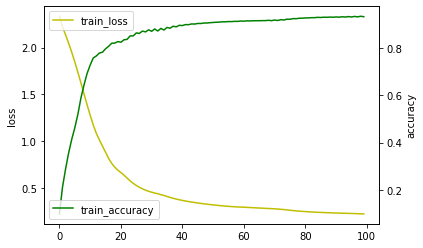

In [492]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history["loss"], "y", label = "train_loss")  
acc_ax.plot(hist.history["accuracy"], "g", label="train_accuracy")

loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc = "upper left")
acc_ax.legend(loc = "lower left")

plt.show()

In [493]:
model_wihtout_hm = get_model() 
st = time.time()
model_wihtout_hm.fit(X_train_normalized, y_train, epochs = 100, verbose=1, batch_size=60000) 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.2816 - accuracy: 0.1618
Epoch 2/100
1/1 [==============================] - 0s 200ms/step - loss: 2.2107 - accuracy: 0.2401
Epoch 3/100
1/1 [==============================] - 0s 168ms/step - loss: 2.1586 - accuracy: 0.3084
Epoch 4/100
1/1 [==============================] - 0s 189ms/step - loss: 2.1067 - accuracy: 0.3723
Epoch 5/100
1/1 [==============================] - 0s 166ms/step - loss: 2.0512 - accuracy: 0.4326
Epoch 6/100
1/1 [==============================] - 0s 186ms/step - loss: 1.9906 - accuracy: 0.4848
Epoch 7/100
1/1 [==============================] - 0s 175ms/step - loss: 1.9243 - accuracy: 0.5291
Epoch 8/100
1/1 [==============================] - 0s 181ms/step - loss: 1.8522 - accuracy: 0.5658
Epoch 9/100
1/1 [==============================] - 0s 165ms/step - loss: 1.7750 - accuracy: 0.5958
Epoch 10/100
1/1 [==============================] - 0s 168ms/step - loss: 1.6936 - accuracy: 0.6236
Epoch 11/100

1/1 [==============================] - 0s 167ms/step - loss: 0.2776 - accuracy: 0.9236
Epoch 84/100
1/1 [==============================] - 0s 184ms/step - loss: 0.2759 - accuracy: 0.9240
Epoch 85/100
1/1 [==============================] - 0s 181ms/step - loss: 0.2742 - accuracy: 0.9242
Epoch 86/100
1/1 [==============================] - 0s 160ms/step - loss: 0.2727 - accuracy: 0.9244
Epoch 87/100
1/1 [==============================] - 0s 164ms/step - loss: 0.2712 - accuracy: 0.9250
Epoch 88/100
1/1 [==============================] - 0s 198ms/step - loss: 0.2698 - accuracy: 0.9251
Epoch 89/100
1/1 [==============================] - 0s 176ms/step - loss: 0.2685 - accuracy: 0.9253
Epoch 90/100
1/1 [==============================] - 0s 162ms/step - loss: 0.2674 - accuracy: 0.9256
Epoch 91/100
1/1 [==============================] - 0s 160ms/step - loss: 0.2665 - accuracy: 0.9255
Epoch 92/100
1/1 [==============================] - 0s 160ms/step - loss: 0.2657 - accuracy: 0.9261
Epoch 93/100


###### Testing the model

In [494]:
model_wihtout_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2549 - accuracy: 0.9273


[0.25491493940353394, 0.927299976348877]

In [495]:
model_hm.evaluate(X_test_normalized, y_test)
#loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
#loss_and_metrics 

313/313 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9351


[0.22939303517341614, 0.9351000189781189]

Let us predict for the first image in the testing set

In [496]:
model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 891us/step


array([[4.8016939e-01, 1.3013861e-02, 5.8862287e-01, ..., 9.9991137e-01,
        3.2274184e-01, 7.8353375e-01],
       [6.8934160e-01, 1.3195622e-01, 9.9909955e-01, ..., 5.6098052e-04,
        8.0692351e-01, 3.0766539e-03],
       [3.7224628e-02, 9.9376047e-01, 6.3715553e-01, ..., 5.0301945e-01,
        4.6549845e-01, 1.7701615e-01],
       ...,
       [6.0851490e-03, 2.7581269e-04, 6.8988129e-02, ..., 7.5437868e-01,
        7.7836454e-01, 9.7885478e-01],
       [9.4261117e-02, 1.8205628e-02, 3.5322413e-01, ..., 6.0682736e-02,
        9.7702575e-01, 3.3876190e-03],
       [7.7243012e-01, 5.3648323e-06, 5.7802999e-01, ..., 1.5050998e-03,
        3.3461575e-03, 1.3529371e-03]], dtype=float32)

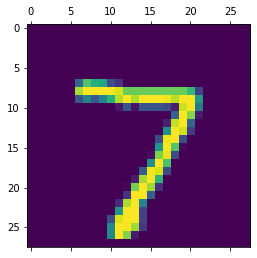

In [497]:
plt.matshow(X_test[0])

In [498]:
y_predicted = model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 869us/step


In [499]:
y_predicted[0]
# Displays the probability score for each class label. 

array([0.4801694 , 0.01301386, 0.58862287, 0.9331859 , 0.02419996,
       0.61536855, 0.00115461, 0.99991137, 0.32274184, 0.78353375],
      dtype=float32)

In [500]:
np.argmax(y_predicted[0])

7

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [501]:
y_predicted[:5]

array([[4.8016939e-01, 1.3013861e-02, 5.8862287e-01, 9.3318588e-01,
        2.4199959e-02, 6.1536855e-01, 1.1546100e-03, 9.9991137e-01,
        3.2274184e-01, 7.8353375e-01],
       [6.8934160e-01, 1.3195622e-01, 9.9909955e-01, 9.5600533e-01,
        1.3914038e-03, 7.5206286e-01, 7.7033532e-01, 5.6098052e-04,
        8.0692351e-01, 3.0766539e-03],
       [3.7224628e-02, 9.9376047e-01, 6.3715553e-01, 4.8602861e-01,
        1.0375075e-01, 1.2127804e-01, 2.5550789e-01, 5.0301945e-01,
        4.6549845e-01, 1.7701615e-01],
       [9.9989289e-01, 3.1264761e-05, 3.6919484e-01, 2.3084453e-01,
        4.4047963e-03, 5.1702589e-01, 2.6259354e-01, 5.1271266e-01,
        1.7374057e-01, 5.0714660e-01],
       [1.6810973e-01, 8.3002361e-04, 4.5487142e-01, 3.0259518e-02,
        9.9365252e-01, 3.8743429e-02, 4.5497832e-01, 5.9841317e-01,
        4.6195814e-01, 9.1401708e-01]], dtype=float32)

In [502]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [503]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    6,    1,    1,    0],
       [   0, 1118,    4,    1,    1,    1,    3,    1,    6,    0],
       [  10,    3,  955,   19,    7,    0,    9,    9,   17,    3],
       [   3,    1,   14,  946,    1,   14,    1,   15,   11,    4],
       [   1,    0,    8,    0,  933,    0,   10,    5,    5,   20],
       [   8,    1,    2,   36,    5,  797,   15,    5,   16,    7],
       [  10,    3,    9,    2,    8,    7,  917,    1,    1,    0],
       [   2,   15,   20,    6,    5,    0,    0,  956,    2,   22],
       [   8,    4,   11,   26,   14,   17,   10,   12,  861,   11],
       [  11,    6,    1,   14,   37,    5,    0,   26,    4,  905]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

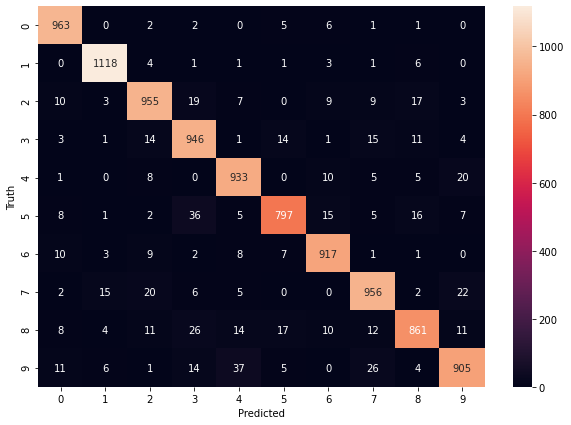

In [504]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')